# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [1]:
!pip install palmerpenguins

In [2]:
from palmerpenguins import load_penguins
import pandas as pd

In [3]:
penguins = load_penguins()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [20]:
penguins = pd.get_dummies(penguins)

Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on a training dataset subset of the entire dataset:

* Four different models, each containing a different set of predictor variables

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

## Testing models with different number of parameters

In [5]:
# Step 1. Import packages and clean the data - dropna
import sklearn
import numpy as np
from sklearn.linear_model import LinearRegression # use LR for now
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

In [6]:
# cleaning the data
penguins = penguins.dropna()

## MODELS

## Model 1: *bill_length_mm, body_mass_g*

---

In [7]:
# defining variables of the model
X = penguins[["bill_length_mm", "body_mass_g"]]
y = penguins["bill_depth_mm"]

In [8]:
# shortcut name for the model
lr = LinearRegression()

In [9]:
# splitting the data into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [10]:
# training the model
m1 = lr.fit(X_train, y_train)

In [11]:
m1.score(X_train, y_train)

0.21678323677849187

In [12]:
# predicting Y based on training dataset X_train
Y_train_pred_m1 = m1.predict(X_train)

In [13]:
# R-squared and MSE for Y_train_pred
r2_m1_train = r2_score(y_train, Y_train_pred_m1)
mse_m1_train = mean_squared_error(y_train, Y_train_pred_m1)

In [14]:
# testing the model
Y_test_pred_m1 = m1.predict(X_test)

In [15]:
# R-squared and MSE for Model 1:
r2_m1_test = r2_score(y_test, Y_test_pred_m1)
mse_m1_test = mean_squared_error(y_test, Y_test_pred_m1)

In [16]:
print(f"R-squared M1 train: {r2_m1_train}")
print(f"MSE LR train: {mse_m1_train}")

R-squared M1 train: 0.21678323677849187
MSE LR train: 3.1112417762459965


In [17]:
print(f"R-squared M1 test: {r2_m1_test}")
print(f"MSE LR test: {mse_m1_test}")

R-squared M1 test: 0.2452762280878522
MSE LR test: 2.650196052923692


## Model 2: *bill_length_mm, species*


*   List item
*   List item


---

In [22]:
# defining variables of the model
X2 = penguins[["bill_length_mm", "species_Adelie", "species_Chinstrap", "species_Gentoo"]]
y = penguins["bill_depth_mm"]

In [23]:
# splitting the data into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.25)

In [24]:
# training the model
m2 = lr.fit(X_train, y_train)

In [25]:
m2.score(X_train, y_train)

0.7595053278347508

In [26]:
# predicting Y based on training dataset X_train
Y_train_pred_m2 = m2.predict(X_train)

In [27]:
# R-squared and MSE for Y_train_pred
r2_m2_train = r2_score(y_train, Y_train_pred_m2)
mse_m2_train = mean_squared_error(y_train, Y_train_pred_m2)

In [28]:
# testing the model
Y_test_pred_m2 = m2.predict(X_test)

In [29]:
# R-squared and MSE for Model 2:
r2_m2_test = r2_score(y_test, Y_test_pred_m2)
mse_m2_test = mean_squared_error(y_test, Y_test_pred_m2)

In [30]:
print(f"R-squared M2 train: {r2_m2_train}")
print(f"MSE M2 train: {mse_m2_train}")

R-squared M2 train: 0.7595053278347508
MSE M2 train: 0.9377684805013499


In [31]:
print(f"R-squared M2 test: {r2_m2_test}")
print(f"MSE M2 test: {mse_m2_test}")

R-squared M2 test: 0.7845043177734876
MSE M2 test: 0.8059938599375471


## Model 3: interaction bill_length * flipper length

---



In [49]:
penguins['bl_fl'] = penguins['bill_length_mm'] * penguins['flipper_length_mm']

In [50]:
# defining variables of the model
X3 = penguins[["bill_length_mm", "flipper_length_mm", "bl_fl"]]
y = penguins["bill_depth_mm"]

In [51]:
# splitting the data into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X3, y, test_size=0.25)

In [52]:
# training the model
m3 = lr.fit(X_train, y_train)

In [53]:
m3.score(X_train, y_train)

0.3738941795886396

In [54]:
# predicting Y based on training dataset X_train
Y_train_pred_m3 = m3.predict(X_train)

In [55]:
# R-squared and MSE for Y_train_pred
r2_m3_train = r2_score(y_train, Y_train_pred_m3)
mse_m3_train = mean_squared_error(y_train, Y_train_pred_m3)

In [56]:
# testing the model
Y_test_pred_m3 = m3.predict(X_test)

In [57]:
# R-squared and MSE for Model 2:
r2_m3_test = r2_score(y_test, Y_test_pred_m3)
mse_m3_test = mean_squared_error(y_test, Y_test_pred_m3)

In [58]:
print(f"R-squared M3 train: {r2_m3_train}")
print(f"MSE M3 train: {mse_m3_train}")

R-squared M3 train: 0.3738941795886396
MSE M3 train: 2.360730879996885


In [59]:
print(f"R-squared M3 test: {r2_m3_test}")
print(f"MSE M3 test: {mse_m3_test}")

R-squared M3 test: 0.355046168027774
MSE M3 test: 2.586480582059456


## Model 4: more predictors and interaction on dychotomous variable  'body_mass_g', 'flipper_length', 'sex_female', 'sex_female'*'body_mass_g'
---



In [61]:
penguins['sf_bm'] = penguins['sex_female'] * penguins['body_mass_g']

In [62]:
penguins.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_female,sex_male,bl_fl,bl_bm,sf_bm
0,39.1,18.7,181.0,3750.0,2007,True,False,False,False,False,True,False,True,7077.1,146625.0,0.0
1,39.5,17.4,186.0,3800.0,2007,True,False,False,False,False,True,True,False,7347.0,150100.0,3800.0
2,40.3,18.0,195.0,3250.0,2007,True,False,False,False,False,True,True,False,7858.5,130975.0,3250.0
4,36.7,19.3,193.0,3450.0,2007,True,False,False,False,False,True,True,False,7083.1,126615.0,3450.0
5,39.3,20.6,190.0,3650.0,2007,True,False,False,False,False,True,False,True,7467.0,143445.0,0.0


In [63]:
# defining variables of the model
X4 = penguins[["body_mass_g", "flipper_length_mm", "sex_female", "sf_bm"]]
y = penguins["bill_depth_mm"]

In [64]:
# splitting the data into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X4, y, test_size=0.25)

In [65]:
# training the model
m4 = lr.fit(X_train, y_train)

In [66]:
m4.score(X_train, y_train)

0.6435080169760061

In [67]:
# predicting Y based on training dataset X_train
Y_train_pred_m4 = m4.predict(X_train)

In [68]:
# R-squared and MSE for Y_train_pred
r2_m4_train = r2_score(y_train, Y_train_pred_m4)
mse_m4_train = mean_squared_error(y_train, Y_train_pred_m4)

In [69]:
# testing the model
Y_test_pred_m4 = m4.predict(X_test)

In [70]:
# R-squared and MSE for Model 2:
r2_m4_test = r2_score(y_test, Y_test_pred_m4)
mse_m4_test = mean_squared_error(y_test, Y_test_pred_m4)

In [71]:
print(f"R-squared M4 train: {r2_m4_train}")
print(f"MSE M4 train: {mse_m4_train}")

R-squared M4 train: 0.6435080169760061
MSE M4 train: 1.3449199819985747


In [72]:
print(f"R-squared M4 test: {r2_m4_test}")
print(f"MSE M4 test: {mse_m4_test}")

R-squared M4 test: 0.6892821379792076
MSE M4 test: 1.2813249853071518


Summarizing four models results into dataframes

In [95]:
r_squared_results = pd.DataFrame({
    "Model": ["Model 1", "Model 1", "Model 2", "Model 2", "Model 3", "Model 3", "Model 4", "Model 4"],
    "Dataset": ["Train", "Test", "Train", "Test", "Train", "Test", "Train", "Test"],
    "R-squared": [r2_m1_train, r2_m1_test, r2_m2_train, r2_m2_test, r2_m3_train, r2_m3_test, r2_m4_train, r2_m4_test]
})
print(r_squared_results)

     Model Dataset  R-squared
0  Model 1   Train   0.216783
1  Model 1    Test   0.245276
2  Model 2   Train   0.759505
3  Model 2    Test   0.784504
4  Model 3   Train   0.373894
5  Model 3    Test   0.355046
6  Model 4   Train   0.643508
7  Model 4    Test   0.689282


In [94]:
mse_results = pd.DataFrame({
    "Model": ["Model 1", "Model 1", "Model 2", "Model 2", "Model 3", "Model 3", "Model 4", "Model 4"],
    "Dataset": ["Train", "Test", "Train", "Test", "Train", "Test", "Train", "Test"],
    "MSE": [mse_m1_train, mse_m1_test, mse_m2_train, mse_m2_test, mse_m3_train, mse_m3_test, mse_m4_train, mse_m4_test]
})
print(mse_results)

     Model Dataset       MSE
0  Model 1   Train  3.111242
1  Model 1    Test  2.650196
2  Model 2   Train  0.937768
3  Model 2    Test  0.805994
4  Model 3   Train  2.360731
5  Model 3    Test  2.586481
6  Model 4   Train  1.344920
7  Model 4    Test  1.281325


## Plotting of models results

---

In [92]:
# Visualziation of the results # assisted with ChatGPT
from plotnine import ggplot, aes, geom_point, geom_line, labs, theme_minimal, scale_color_manual, facet_wrap

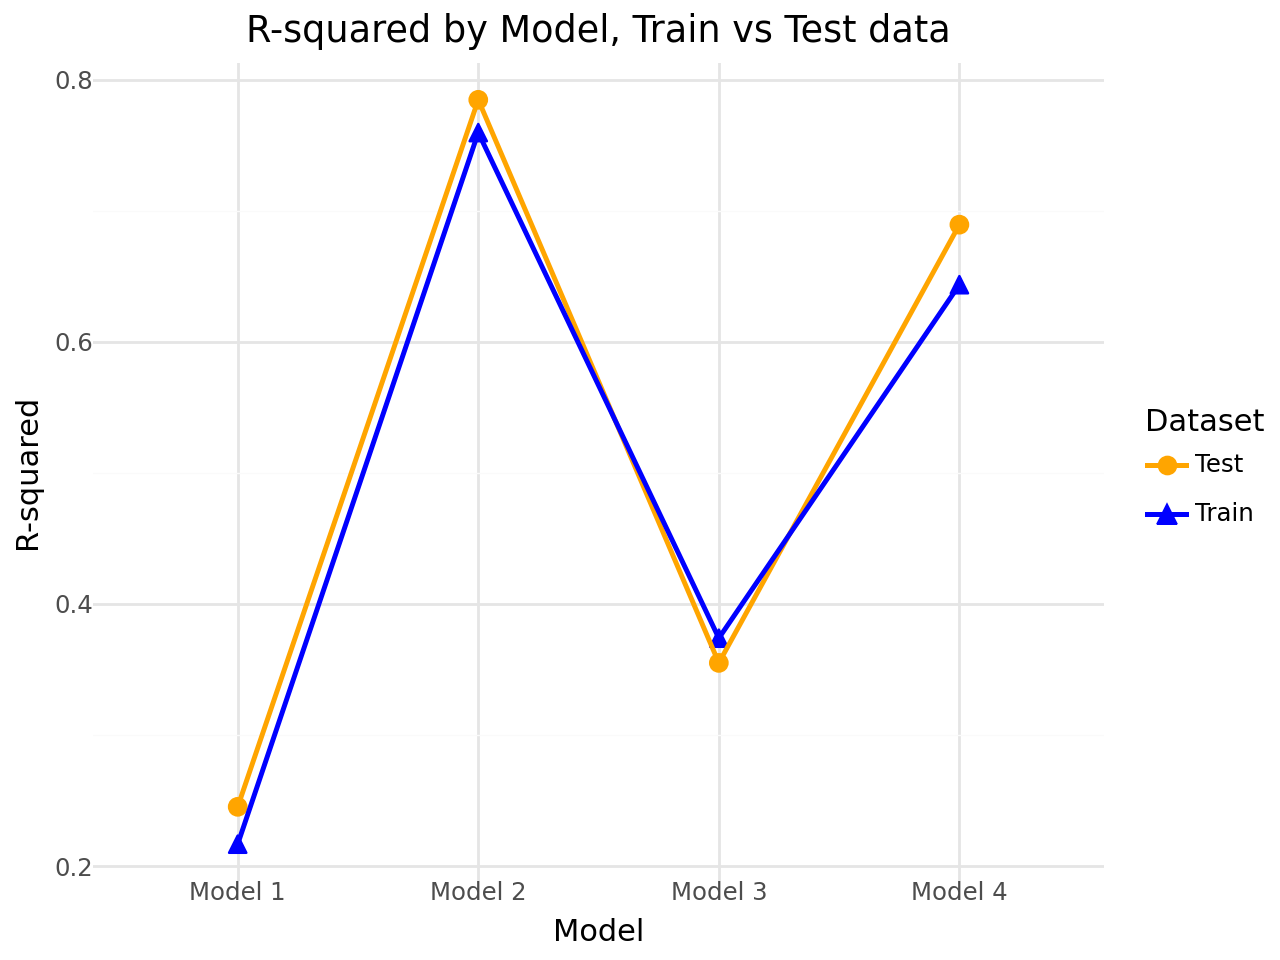

In [128]:
# Plot of Train & Test R-squared for each Model
(ggplot(r_squared_results, aes(x='Model', y='R-squared', color='Dataset', shape='Dataset'))
    + geom_point(aes(group='Model'),size=3)
    + geom_line(aes(group='Dataset'), size=1)
    + labs(title='R-squared by Model, Train vs Test data', x='Model', y='R-squared')
    + theme_minimal()
    + scale_color_manual(values={'Train': 'blue', 'Test': 'orange'})
)

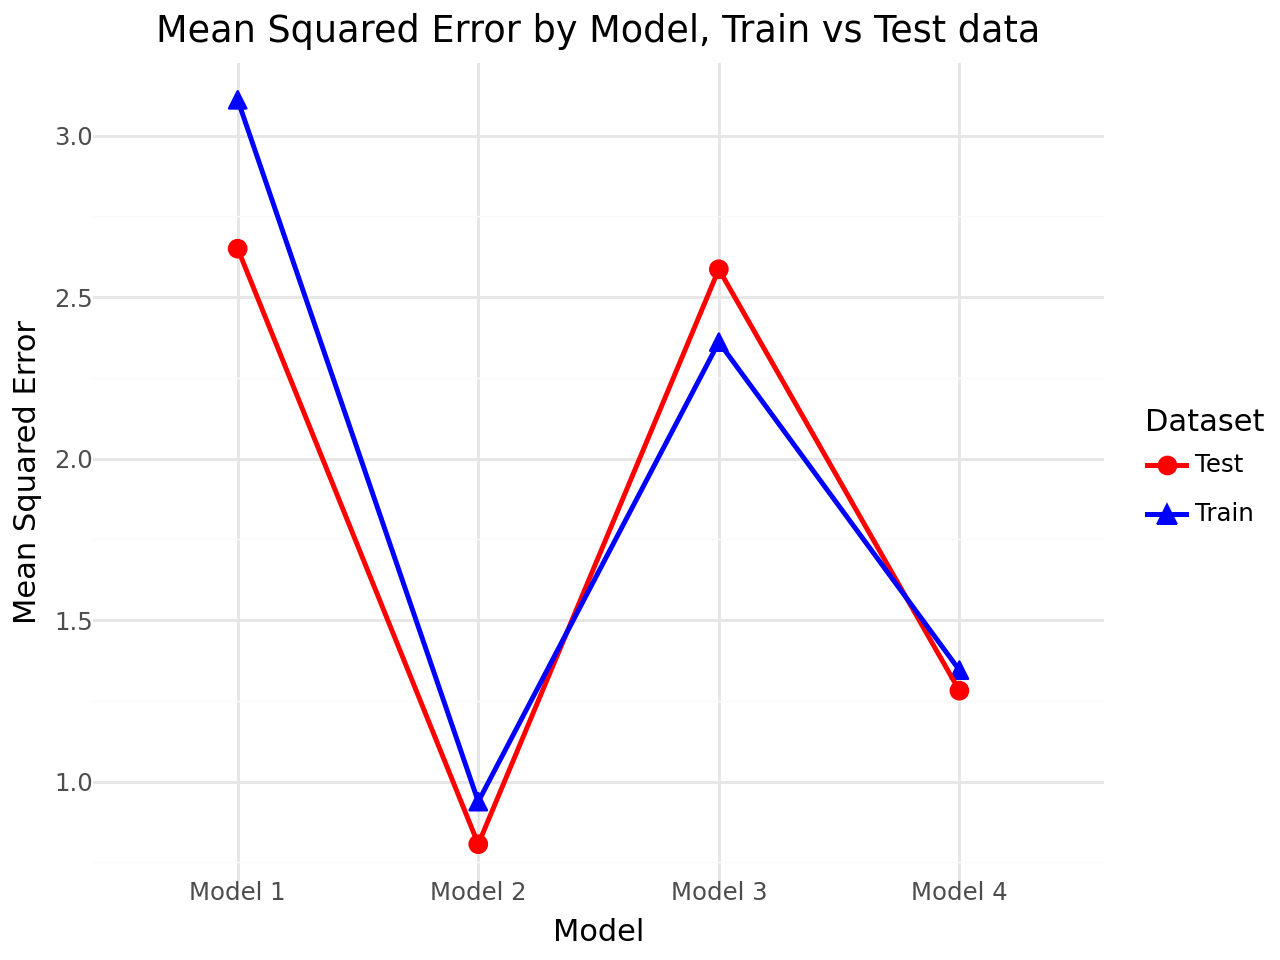

In [129]:
# MSE Plot
(ggplot(mse_results, aes(x='Model', y='MSE', color='Dataset', shape='Dataset'))
    + geom_point(aes(group='Dataset'),size=3)
    + geom_line(aes(group='Dataset'), size=1)
    + labs(title='Mean Squared Error by Model, Train vs Test data', x='Model', y='Mean Squared Error')
    + theme_minimal()
    + scale_color_manual(values={'Train': 'blue', 'Test': 'red'})
)


Answer:
---

Based on the R-squared and MSE results of the four tested models (also visible on the plots) - Model 2 (*bill_length_mm, species*), appears to be the most efficient and robust in predicting the bill_depth of a penguin from the dataset. This model scores the highest R-squared on both train and (even higher) on test data, while has the lowest MSE on both data samples. Model 4 is a runner-up with slightly worse results on both metrics and data samples. While Model 1 and 3 performed the lowest on according to these metrics.